# Lab 2 - Jay Lunia - 8947792

### Importing Necessary Libraries

In [1]:
# Basic
import pandas as pd
import numpy as np

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Model Performace
from sklearn.metrics import classification_report

# Part A

In [2]:
file_path= '../../practical_labs/datasets/Lab_2/'

### Step 1: Load the dataset


In [3]:
data = pd.read_csv(f'{file_path}/Lab2_dataset.csv',index_col=0)

### Step 2: Preprocessing


In [4]:
CV = CountVectorizer(max_features=1500)

__Vectorizing the `Independent data`__

In [5]:
X = CV.fit_transform(data['text'])


__Taking `Dependent variable`__

In [6]:
y = data['label_num']

### Step 3: Split the dataset into training and testing


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Step 4: Model Training and Evaluation


In [8]:
# Enitalization of the models
SVC = SVC()
GNB = GaussianNB()
MNB = MultinomialNB()

In [9]:
models = {'SVC':SVC,'Gaussian NB':GNB,'Multinomial NB':MNB}
for name,model in models.items():
    
    # Training the model
    model.fit(X_train.toarray(), y_train)
    
    # Predicting the y_test
    y_pred = model.predict(X_test.toarray())
    
    # Evaluating the models
    report = classification_report(y_test, y_pred)
    
    # printing the results
    print('='*75)
    print(name)
    print(f"Classification Report for {name}:")
    print(report)
    print('='*75)
    
    
    
    

SVC
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       725
           1       0.90      0.97      0.93       310

    accuracy                           0.96      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Gaussian NB
Classification Report for Gaussian NB:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       725
           1       0.85      0.97      0.91       310

    accuracy                           0.94      1035
   macro avg       0.92      0.95      0.93      1035
weighted avg       0.95      0.94      0.94      1035

Multinomial NB
Classification Report for Multinomial NB:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       725
           1       0.85      0.94      0.89       310

    accuracy                           

- `SVC` model performance was the best with the `accuracy of 96%` and `precision of 99%`.

# Part B

In [10]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


### step 1: Load the dataset

In [11]:
data_AB = pd.read_csv(f'{file_path}/AB_NYC_2019.csv')

In [12]:
data_AB.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Step 2: Analyzing the Price column

In [13]:
price = data_AB['price']

In [14]:
price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: >

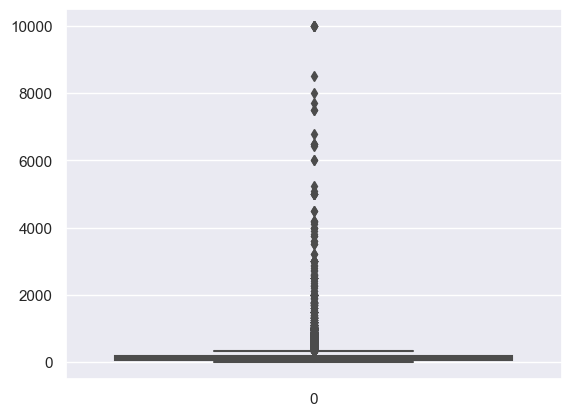

In [15]:
sns.boxplot(price)

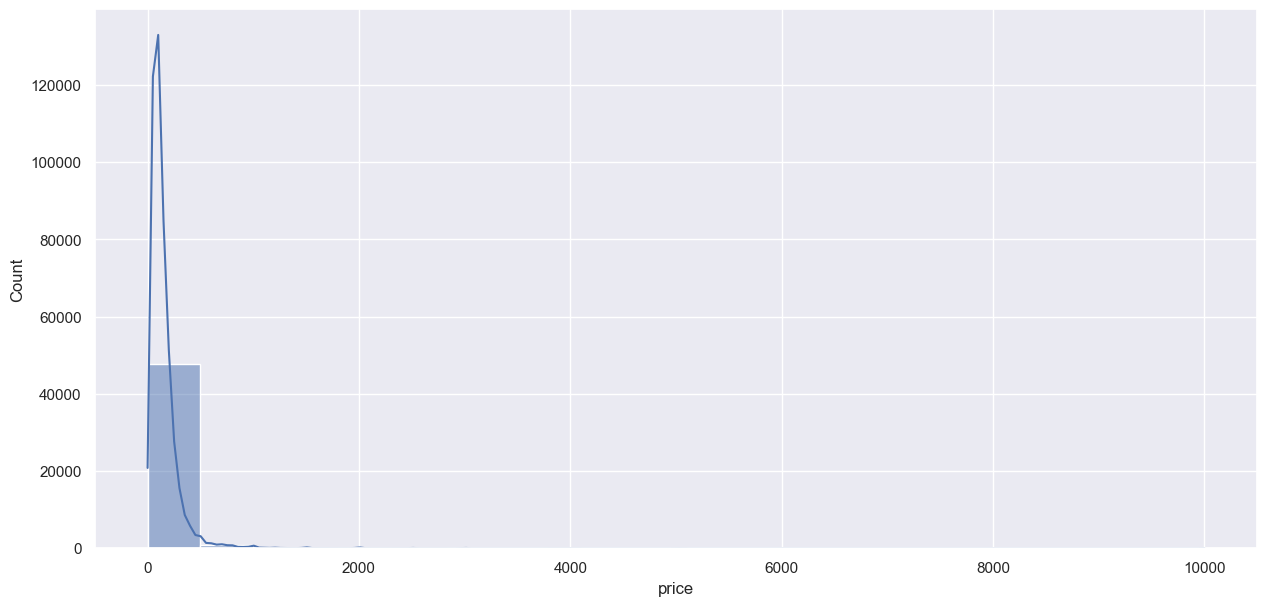

In [16]:
plt.figure(figsize=[15,7])
sns.histplot(x=price, bins =20, kde=True)
plt.show()

### Step 4: Removing outliers with different approaches

#### 4.1 Z-score approach

In [17]:
# Calculate Z-scores
Z_score = np.abs((price - price.mean()) / price.std())

# Define threshold
Z_threshold = 2

zscore_data = data_AB[Z_score <= Z_threshold]


<Axes: >

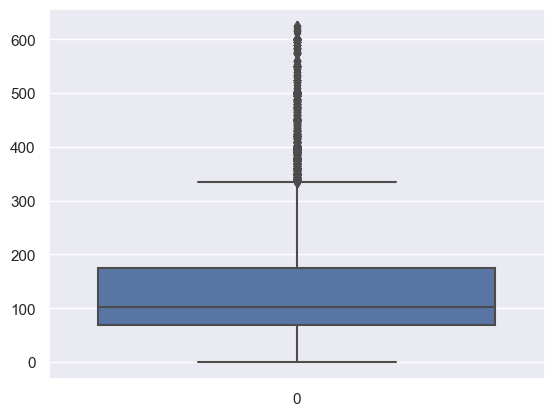

In [18]:
sns.boxplot(zscore_data['price'])

median:103.0	 mean:134.07 	 mode:100


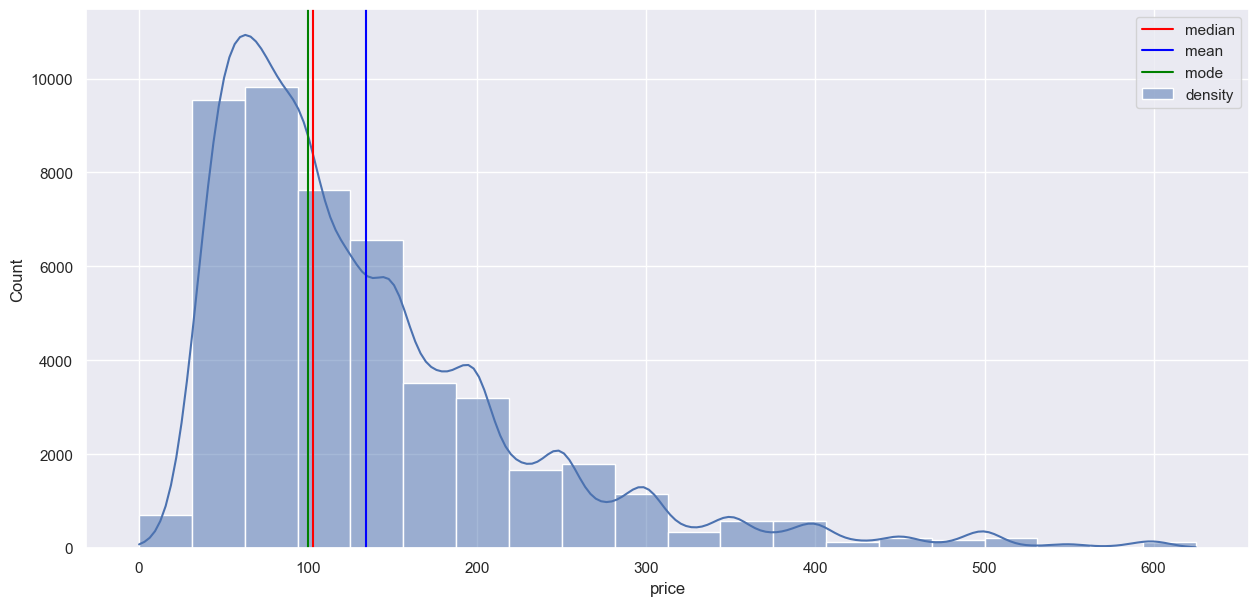

In [19]:
median = np.median(zscore_data['price'])
mean = np.mean(zscore_data['price'])
mode = zscore_data['price'].value_counts().index[0]
print(f'median:{median}\t mean:{mean:.2f} \t mode:{mode}')
plt.figure(figsize=[15,7])
sns.histplot(x=zscore_data['price'], bins =20, kde=True , label = 'density', alpha = 0.5)
plt.axvline(median, c='red',label = 'median')
plt.axvline(mean, c='blue' , label ='mean')
plt.axvline(mode, c='green' , label = 'mode')
plt.legend()
plt.show()


#### 4.2 IQR approach


In [20]:
Q1,Q3 = price.quantile([0.25,.75])
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

lower_bound = price >= lower_whisker
upper_bound = price <= upper_whisker
iqr_data = data_AB[(lower_bound) & (upper_bound)]

<Axes: >

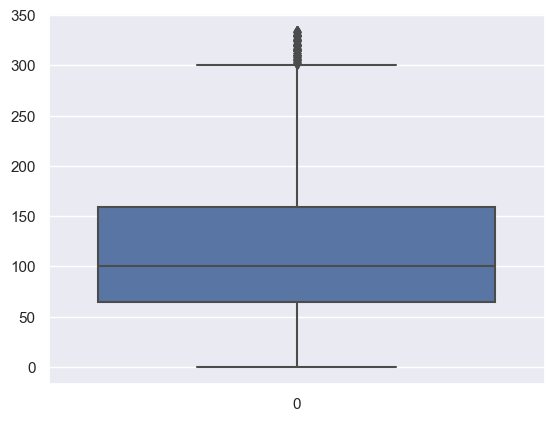

In [21]:
sns.boxplot(iqr_data['price'])

median:100.0	 mean:119.97 	 mode:100



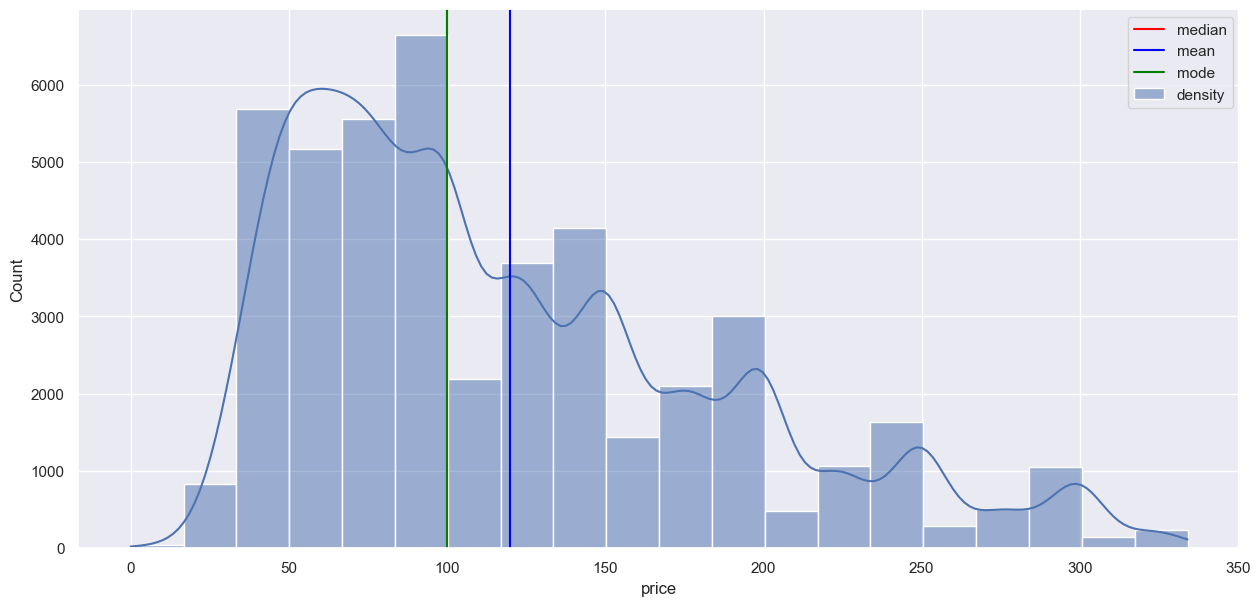

In [22]:
median = np.median(iqr_data['price'])
mean = np.mean(iqr_data['price'])
mode = iqr_data['price'].value_counts().index[0]
print(f'median:{median}\t mean:{mean:.2f} \t mode:{mode}')
print()
plt.figure(figsize=[15,7])
sns.histplot(x=iqr_data['price'], bins =20, kde=True , label = 'density', alpha = 0.5)
plt.axvline(median, c='red',label = 'median')
plt.axvline(mean, c='blue' , label ='mean')
plt.axvline(mode, c='green' , label = 'mode')
plt.legend()
plt.show()

#### Compare the two approaches


In [23]:
print(f"Original dataset size: {data_AB.shape}")
print(f"Dataset size after Z-score method: {zscore_data.shape}")
print(f"Dataset size after IQR method: {iqr_data.shape}")

Original dataset size: (48895, 16)
Dataset size after Z-score method: (48128, 16)
Dataset size after IQR method: (45923, 16)


In [24]:
median_z = np.median(zscore_data['price'])
mean_z = np.mean(zscore_data['price'])
print(f'Approch 1: Z-score \nmedian:{median_z}\t mean:{mean_z:.2f} \n')
display(zscore_data['price'].describe())


median_iqr = np.median(iqr_data['price'])
mean_iqr = np.mean(iqr_data['price'])
print(f'Approch 2: IQR\nmedian:{median_iqr}\t mean:{mean_iqr:.2f} \n')
display(iqr_data['price'].describe())



Approch 1: Z-score 
median:103.0	 mean:134.07 



count    48128.000000
mean       134.068505
std         93.961420
min          0.000000
25%         69.000000
50%        103.000000
75%        175.000000
max        625.000000
Name: price, dtype: float64

Approch 2: IQR
median:100.0	 mean:119.97 



count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

__The `2nd approch` seems to be give good results as__
- The standard deviation is dropped alot
- The mean is relatively close to the median
- The median is exactly equal to the mode
- Outlier detection is much better by 2nd approch
